In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from datetime import datetime
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from IPython.display import clear_output
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist

In [2]:
# Import the CSV
df = pd.read_csv("Test.csv")

In [3]:
# Make sure the data properly imported.
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6


In [4]:
# Checking column names for consistancy
df.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1'],
      dtype='object')

In [5]:
# Get summary statistics for the data.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2627.0,463433.918919,2618.245698,458989.0,461162.5,463379.0,465696.0,467968.0
Age,2627.0,43.649791,16.967015,18.0,30.0,41.0,53.0,89.0
Work_Experience,2358.0,2.552587,3.341094,0.0,0.0,1.0,4.0,14.0
Family_Size,2514.0,2.825378,1.551906,1.0,2.0,2.0,4.0,9.0


## Functions

In [6]:
def make_hist_plots(data):
    # Using fig and axs set up the dimenstions of the subplots.
    fig, axs = plt.subplots(len(data.columns), 1, figsize = (8, 40))
    
    # Loop through the data to plot a histogram.
    # Enumerate keeps track of the i value.
    for i, ax in enumerate(axs):
        ax.hist(data.iloc[:,i])
        ax.set_title(data.columns[i].title() + ' Histogram', fontsize = 12,fontweight= "bold")
    
    # Tight layout prints the plots close together.
    plt.tight_layout()
   
    # Use show to display the plots.
    plt.show()

In [7]:
def box_plot(data, name):
    # Create the boxplot
    plt.boxplot(data[name])

    # Add title and labels
    plt.title(name)
    plt.ylabel('Value')

    # Display the plot
    plt.show()

In [8]:
# Function to remove outliers.
def remove_outliers(data, col):
        # Define the the first quartile.
        q1 = data[col].quantile(0.25)
        # Define the 3rd quartile. 
        q3 = data[col].quantile(0.75)
        # The interquaratile range is the difference between the first and third. 
        qRange = q3 -q1
        # The lower range should be 1 and a half times lower than the IQR.
        lower  = q1 -1.5 *qRange
        # The upper range should be 1 and a half times higher than the IQR.
        upper = q3 +1.5 *qRange
        # The new data should have remove the outliers from the upper and lower ranges.
        new_data = data.loc[(data[col] > lower) & (data[col] < upper)]
        return new_data

## Data Prep/ Cleaning

In [9]:
# Get an intial count of the rows and columns of the data.
df.shape

(2627, 10)

In [10]:
# Get the total amount of null values per colimn.
df.isna().sum()

ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
dtype: int64

In [11]:
# Drop the rows with null valueds.
df = df.dropna()

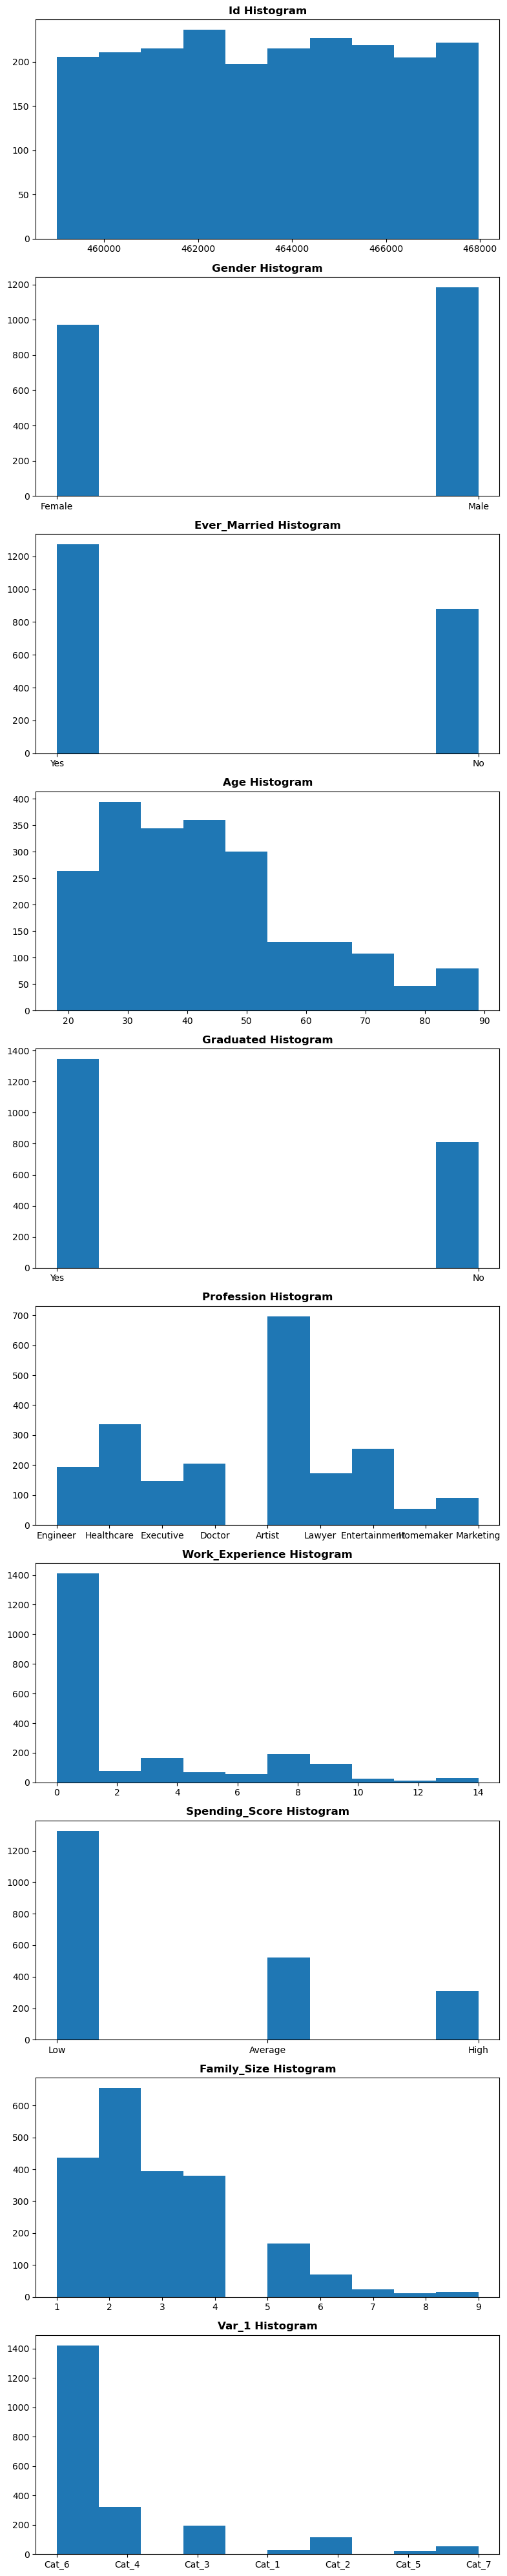

In [12]:
# Check the histograms for distributions.
make_hist_plots(df)

In [13]:
# Transform the age column to normalize the distribution.
df['Age'] = np.sqrt(df['Age'])

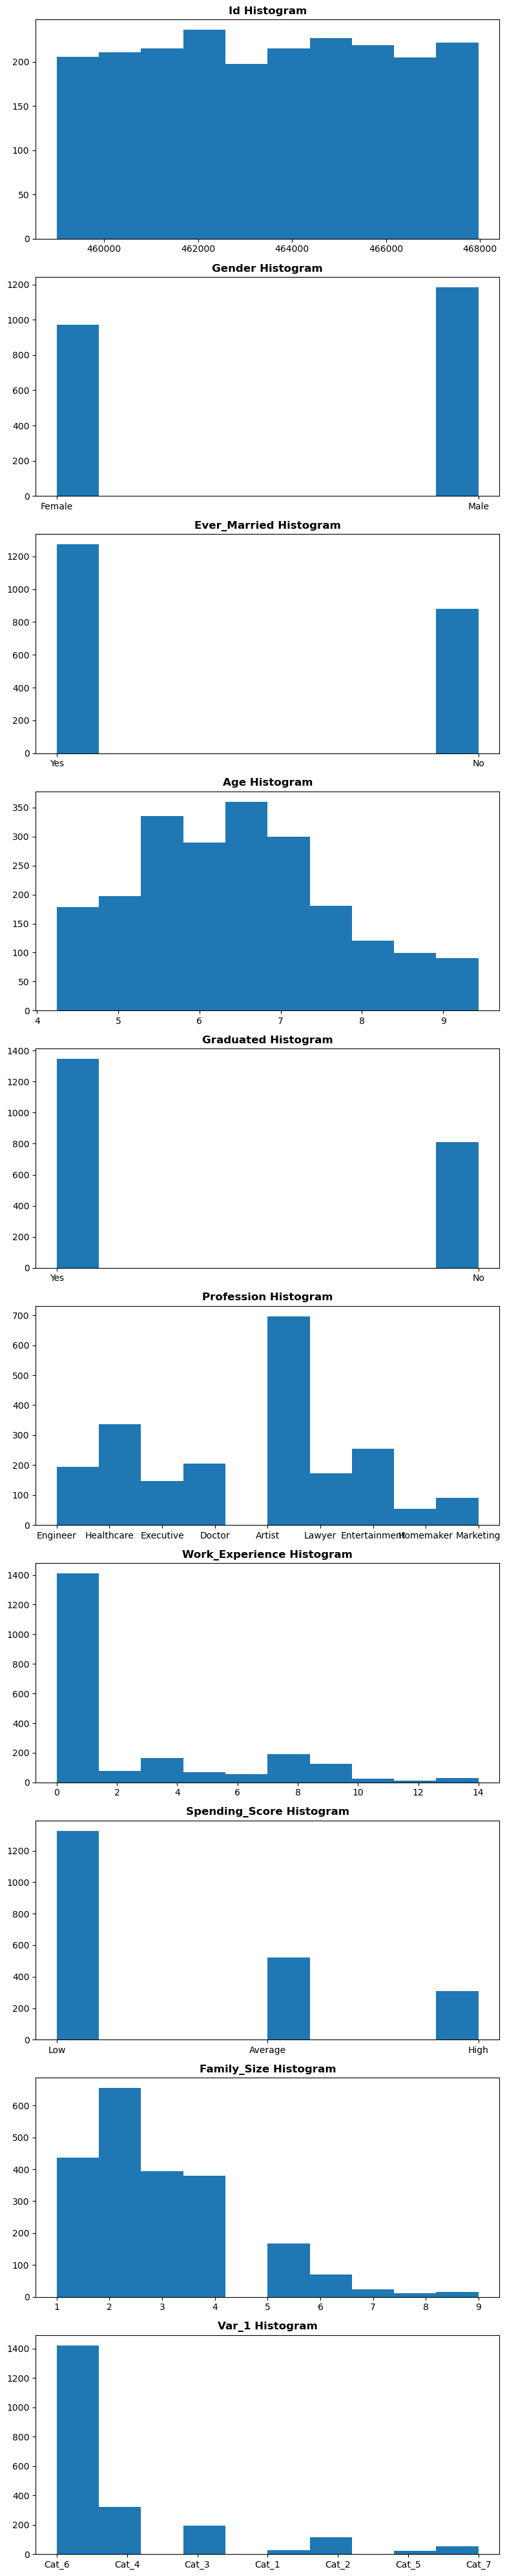

In [14]:
# Check the histograms for distributions again.
make_hist_plots(df)

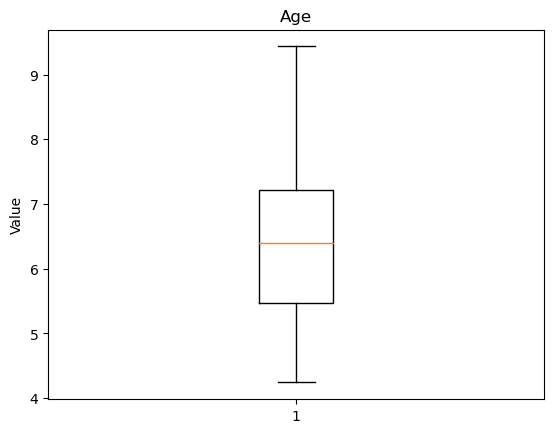

In [15]:
# Create a box plot for age.
box_plot(df, 'Age')

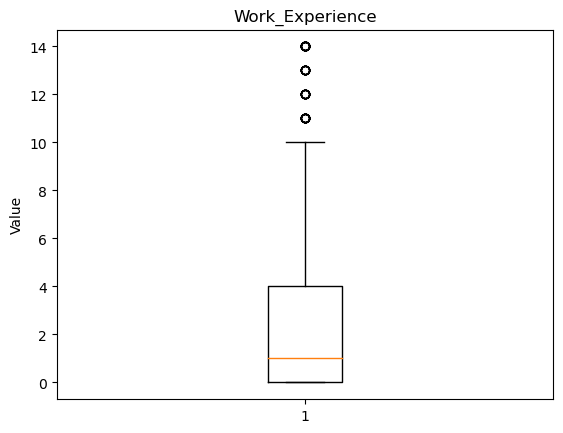

In [16]:
# Create a box plot for work experience.
box_plot(df, 'Work_Experience')

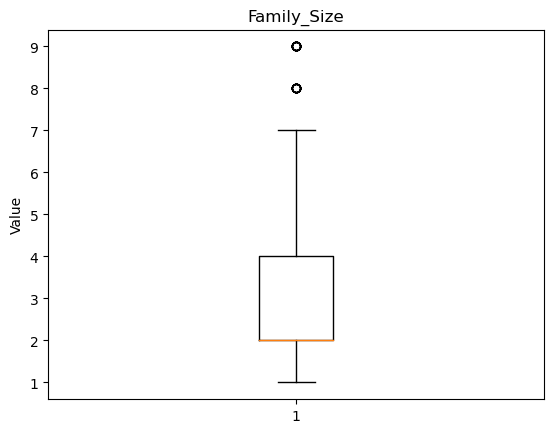

In [17]:
# Create a box plot for family size.
box_plot(df, 'Family_Size')

In [18]:
# Make a list of the columns with outliers.
outlier_col = ['Family_Size', 'Work_Experience']

# Loop through the list and call the remove outler function to remove the outliers.
for i in outlier_col:
    df = remove_outliers(df, i)

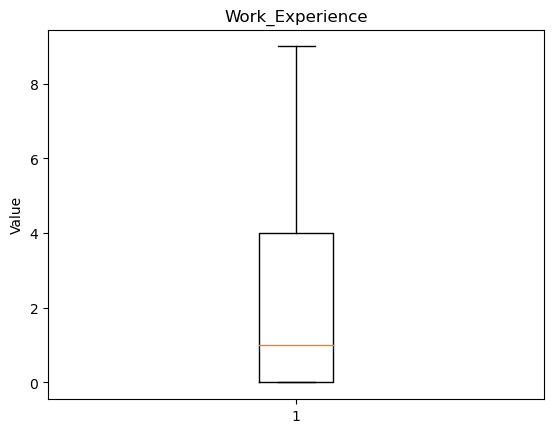

In [19]:
# Check that the outliers were removed from work experience.
box_plot(df, 'Work_Experience')

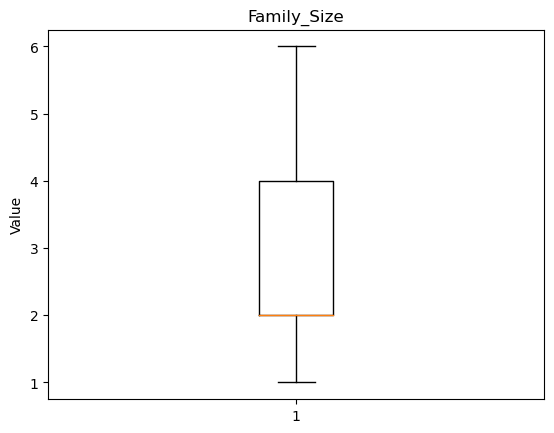

In [20]:
# Check that the outliers were removed from family size.
box_plot(df, 'Family_Size')

In [21]:
# Check the data types of each column.
df.dtypes

ID                   int64
Gender              object
Ever_Married        object
Age                float64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
dtype: object

In [22]:
# Create an integer mapping for each column value that is a string.

gender_id = {'Male': 0, 'Female': 1}
married_id = {'No': 0, 'Yes': 1}
graduated_id = {'No': 0, 'Yes': 1}
spending_id = {'Low': 0, 'Average': 1, 'High': 2}
profession_id = {'Engineer':0, 'Healthcare': 1, 'Executive': 2, 
                 'Doctor': 3, 'Artist': 4,'Lawyer': 5, 
                 'Entertainment': 6, 'Homemaker': 7, 'Marketing': 8}
var_id = {'Cat_1': 1, 'Cat_2': 2,'Cat_3': 3, 'Cat_4': 4, 'Cat_5': 5, 'Cat_6': 6, 'Cat_7': 7}

# Map these back to the dataframe.
df['Ever_Married'] = df['Ever_Married'].map(married_id)
df['Graduated'] = df['Graduated'].map(graduated_id)
df['Gender'] = df['Gender'].map(gender_id)
df['Spending_Score'] = df['Spending_Score'].map(spending_id)
df['Profession'] = df['Profession'].map(profession_id)
df['Var_1'] = df['Var_1'].map(var_id)

## Exploratory Data Analysis

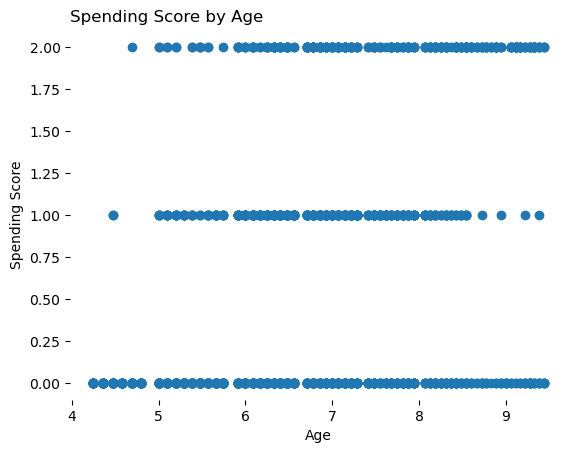

In [23]:
# Create a scatter plot for age and spending score.
plt.scatter(x= df.Age, y = df.Spending_Score)

# Set parameters to adjust the font type.
plt.rcParams["font.family"] = "Arial"

# Provide a title and axis labels to the plot and display the plot.
plt.title("Spending Score by Age", loc='left')
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.box(False)
plt.show()

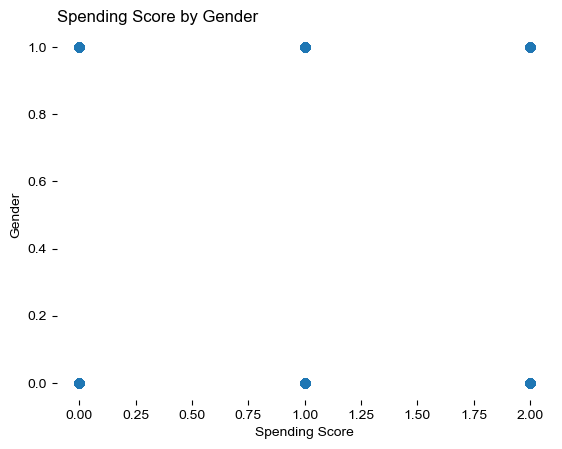

In [24]:
# Create a scatter plot for gender and spending score.
plt.scatter(x= df.Spending_Score, y = df.Gender)

# Set parameters to adjust the font type.
plt.rcParams["font.family"] = "Arial"

# Provide a title and axis labels to the plot and display the plot.
plt.title("Spending Score by Gender", loc='left')
plt.xlabel("Spending Score")
plt.ylabel("Gender")
plt.box(False)
plt.show()

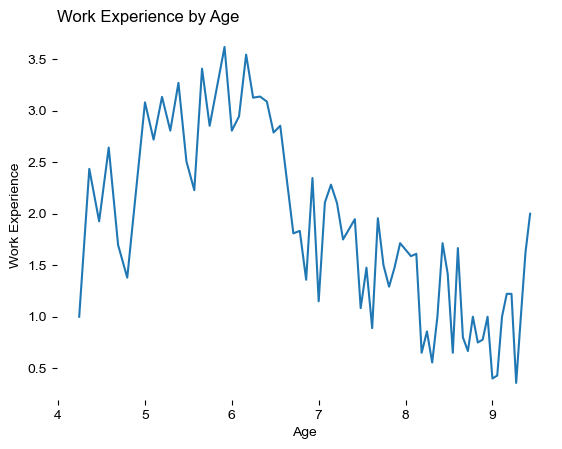

In [25]:
# Group by age and get the mean work experience by group and rest the index.
work_exp = df.groupby('Age')['Work_Experience'].mean().reset_index()

# Make a line plot of the work experience by age.
plt.plot(work_exp.Age, work_exp.Work_Experience)

# Set parameters to adjust the font type.
plt.rcParams["font.family"] = "Arial"

# Provide a title and axis labels to the plot and display the plot.
plt.xlabel("Age")
plt.ylabel("Work Experience")
plt.title("Work Experience by Age", loc='left')
plt.box(False)

In [26]:
# Make two seperate dataframes by gender.
male = df[df['Gender'] == 0]
female = df[df['Gender'] == 1]

# Get a count of all the members for each spending score by gender.
male_cat = male.groupby('Spending_Score').count().reset_index()
female_cat = female.groupby('Spending_Score').count().reset_index()

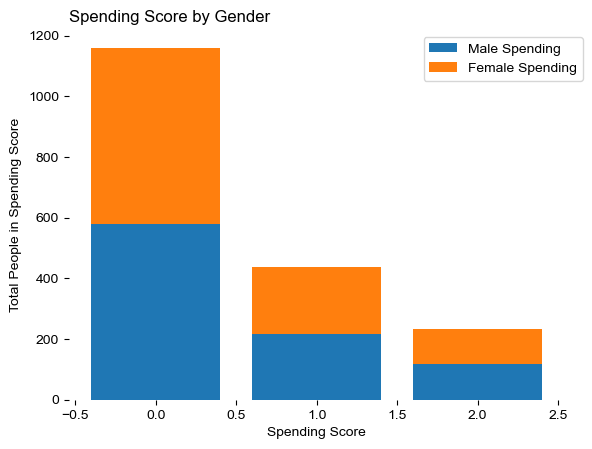

In [27]:
# Plot a stacked bar chart using subplots.
fig, ax = plt.subplots()

# Plot the first set of bars for male spending score.
ax.bar(male_cat["Spending_Score"], male_cat["ID"], label='Male Spending')

# Plot the second set of bars on top of the first for female spending score.
ax.bar(female_cat["Spending_Score"], female_cat["ID"], bottom=female_cat["ID"], label='Female Spending')

# Add labels,  legend, change font and remove plot box.
plt.rcParams["font.family"] = "Arial"
ax.set_xlabel('Spending Score')
ax.set_ylabel('Total People in Spending Score')
ax.set_title('Spending Score by Gender', loc='left')
plt.box(False)

# Move legend to the upper right.
ax.legend(bbox_to_anchor=(1.05, 1), loc = 'upper right')

# save and show the plot.
plt.savefig('stack plot.jpg') 
plt.show()

## K-Means Model Prep

The K means model from scratch was used with the guidance from the youtube video listed in the references section.

In [28]:
#Drop the ID and the VAR_1 columns
mod_data = df.drop(["ID", "Var_1"], axis = 1)

In [29]:
# Create a list of the dataframe columns.
features = mod_data.columns.tolist()

# Make a copy of the dataframe with these features
mod_data = df[features].copy()

# Display the first 5 results.
mod_data.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,1,1,6.000000,1,0,0.0,0,1.0
1,0,1,6.082763,1,1,8.0,1,4.0
5,0,1,6.855655,1,3,0.0,2,5.0
6,0,1,7.810250,1,3,5.0,0,3.0
7,1,1,6.855655,1,4,1.0,1,3.0


In [30]:
# scale the data.

mod_data = ((mod_data - mod_data.min()) / (mod_data.max()-mod_data.min())) * 9 + 1

In [31]:
# get the statistics for the data.
mod_data.describe()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
count,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000
mean,5.036765,6.430882,4.917869,6.691176,4.927022,3.251961,3.422059,4.116471
std,4.477191,4.403744,2.172841,4.340545,2.347719,2.917073,3.294712,2.445226
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,3.140346,1.000000,3.250000,1.000000,1.000000,2.800000
50%,1.000000,10.000000,4.745536,10.000000,5.500000,2.000000,1.000000,2.800000
75%,10.000000,10.000000,6.265928,10.000000,6.625000,5.000000,5.500000,6.400000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [32]:
# Get the centers for the specified clusters.
def get_cents(data, j):
    # Make an empty list to hold the centroids.
    centroids = []
    
    # Create a loop to go through the each clusters
    for i in range(j):
        
        # Apply the lambda function to obtein the centroid in the data.
        centroid = mod_data.apply(lambda x: float(x.sample()))
        # Add this to the list.
        centroids.append(centroid)
    # Return the controids as a data frame.     
    return pd.concat(centroids, axis = 1)

In [33]:
# Get the centroids for the 2 clusters.
centroids = get_cents(mod_data, 2)

/var/folders/f_/66q15ky571n6hrxc10x9g4g40000gn/T/ipykernel_48706/2326945327.py:10: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroid = mod_data.apply(lambda x: float(x.sample()))


In [34]:
# Get labs obtaince the distance from the datapoints.
def get_labs(mod_data, centroids):
    # Distance is the difference beteween the data points squared, then added and the root is taken.
    distance = centroids.apply(lambda x: np.sqrt(((mod_data - x) **2).sum(axis=1)))
    # return the minimum ID for distance.
    return distance.idxmin(axis=1)

In [35]:
# Call the get labs function with the data set and the centroids. 
labs = get_labs(mod_data, centroids)

In [36]:
# Obtain the total for each label cetegory.
labs.value_counts()

0    1548
1     492
Name: count, dtype: int64

In [37]:
# geometric mean for customers in each centroid
def new_centers(mod_data, labs, k):
    # For each label the new center becomes the mean log value of the data and the natural log is taken.
    return mod_data.groupby(labs).apply(lambda x: np.exp(np.log(x).mean())).T

In [38]:
# Create a plot of the clusters and centroids.
def plot_cust(mod_data, labs, centroids, iteration):
    # PCA takes in the number of clusters. in our case 2.
    pca = PCA(n_components=2)
    # Make two dimensial data by fitting and tranforming the data to the PCA.
    new_data = pca.fit_transform(mod_data)
    # Make two dimensial cnetroids by tranforming the centroids to the PCA.
    new_centroids = pca.transform(centroids.T)
    # Clear the output after each iteration.
    clear_output(wait=True)
    # Set the font type for the plot.
    plt.rcParams["font.family"] = "Arial"
    # Set the title for the plot.
    plt.title(f'Iteration {iteration}')
    # Make a scatter plot of the data and centroids.
    plt.scatter(x=new_data[:,0], y=new_data[:, 1], c=labs)
    plt.scatter(x=new_centroids[:,0], y=new_centroids[:, 1])
    plt.show()

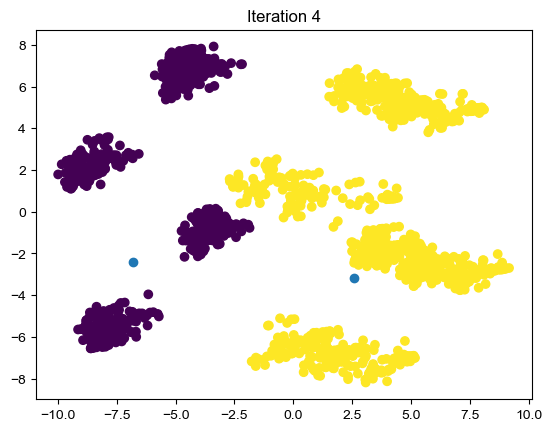

In [39]:
# The maximum iterations for the plot will be 1000.
max_iterations = 100

# Our clusters will be two.
k = 2

# Obtain the centroids from the get_cents function.
centroids= get_cents(mod_data, k)

# Make a dataframe for the old centroids.
old_centroids = pd.DataFrame()

# Initiate iterations to 1.
iteration = 1

# Loop the plot but stop at the max iterations or when the centroids no longer change.
while iteration < max_iterations and not centroids.equals(old_centroids):
    
    # Initiaite the old centroids to be the current centroids.
    old_centroids = centroids
    
    # Obtain the labels.
    labs = get_labs(mod_data, centroids)
    
    # Obtain the new centers
    centroids = new_centers(mod_data, labs, k)
    # Plat the data.
    plot_cust(mod_data, labs, centroids, iteration)
    # Increase the iteration
    iteration +=1
    

In [40]:
# Display the centroids/ categories for the clusters.
centroids

,0,1
Gender,3.184859,2.586263
Ever_Married,1.000000,10.000000
Age,2.959285,5.659359
Graduated,3.230507,5.167033
Profession,3.649282,4.619468
Work_Experience,2.489106,2.197001
Spending_Score,1.000000,3.515208
Family_Size,3.287663,3.331179


In [41]:
# Obtain and print the silhouette score.
score = silhouette_score(mod_data, labs)
print(f"Silhouette Score: {score}")

Silhouette Score: 0.28041030316259896


## K-Means from Scikit learn

In [42]:
# Drop the ID and VAR_1 column from the initial data set.

df.drop('ID', axis=1, inplace = True)
df.drop('Var_1', axis=1, inplace = True)

In [43]:
# Create an empty list for the ditortions.
dists = []

# Create an empty dictionary for the mapping.
maps = {}

# Set the range to check between 1 and 10 clusters.
K = range(1, 10)

# Loop through the clusters.
for k in K:
    # Obtian a k means model for each cluster
    kmeans = KMeans(n_clusters=k, random_state= 36).fit(df)
    # add the euclidean distance between the data and centers and add this to the distortions list. 
    dists.append(sum(np.min(cdist(df, kmeans.cluster_centers_, 'euclidean'), axis=1)**2) / df.shape[0])
    # The mapping will be the last item from the distortions.
    maps[k] = dists[-1]
    

Distortion values:
1 : 17.52749466966208
2 : 10.246898580730525
3 : 7.4845532018542755
4 : 6.69547142166002
5 : 6.07409365617229
6 : 5.3775895110788
7 : 4.90381734527993
8 : 4.856261103350348
9 : 4.704021996903216


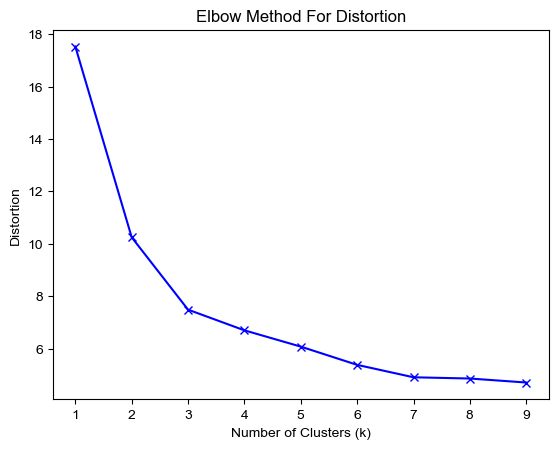

In [44]:
# Print the distortion values for the data.
print("Distortion values:")
# Loop through the the distortions and print each key and value.
for key, val in maps.items():
    print(f'{key} : {val}')

# Plot the distortions and their distance.
plt.plot(K, dists, 'bx-')
# Create labels and a title for the plot.
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.title('Elbow Method For Distortion')
plt.show()

In [45]:
# create a list of the possible amount of clusters.
c = [2, 3, 4, 5, 6, 7, 8, 9]

#Create a loop to check the silhouette score for each cluster.
for i in c:
    # Make a k means model with the clsuter and a random state,
    kmodel = KMeans(i, random_state = 36)
    # Fit the data to the  means model.
    kmodel.fit(df)
    # obtiain and print the the silhouette score for each cluster.
    score = silhouette_score(df, kmodel.labels_)
    print(f"Silhouette Score: {score}")
    

Silhouette Score: 0.42635604013380296
Silhouette Score: 0.3322695955356506
Silhouette Score: 0.2833874824503832
Silhouette Score: 0.2595064112399696
Silhouette Score: 0.2756362323334624
Silhouette Score: 0.24580998789325695
Silhouette Score: 0.2199779320111808
Silhouette Score: 0.2159896634897718


In [46]:
# Create the k meand model with 2 clusters and a random state.
kmodel = KMeans(2, random_state = 36)

# Fit the data to the model.
kmodel.fit(df)

KMeans(n_clusters=2, random_state=36)

In [47]:
# Obtain the silhouette score from the data and k means labels.
score = silhouette_score(df, kmodel.labels_)

# Print the socre.
print(f"Silhouette Score: {score}")

Silhouette Score: 0.42635604013380296


In [48]:
# Obtain and print the cluster centers from the k modal and display the categories
centroids = kmodel.cluster_centers_
pd.DataFrame(centroids, columns=df.columns.tolist()).T

,0,1
Gender,0.434357,0.491159
Ever_Married,0.627694,0.530452
Age,6.623126,6.139788
Graduated,0.615284,0.683694
Profession,3.476813,3.532417
Work_Experience,0.702155,6.913556
Spending_Score,0.562378,0.465619
Family_Size,2.778576,2.589391


References:

DataQuest. (n.d.). K-means Clustering From Scratch In Python [Machine Learning Tutorial]. Retrieved from https://www.youtube.com/watch?v=lX-3nGHDhQg 